In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Lorenz attractor

## Because this is a simple non-linear ODE, it would be more easily done using SciPy's ODE solver, but this approach depends only upon NumPy.

In [47]:
def lorenz(xyz, *, s=10, r=28, b=2.667):
    """
    Parameters
    ----------
    xyz : array-like, shape (3,)
       Point of interest in three-dimensional space.
    s, r, b : float
       Parameters defining the Lorenz attractor.

    Returns
    -------
    xyz_dot : array, shape (3,)
       Values of the Lorenz attractor's partial derivatives at *xyz*.
    """
    x, y, z = xyz
    x_dot = s * (y - x)
    y_dot = r * x - y - x * z
    z_dot = x * y - b * z
    return np.array([x_dot, y_dot, z_dot])

In [48]:
dt = 0.01
num_steps = 10000

In [49]:
xyzs = np.empty((num_steps + 1, 3)) # Need one more for initial values
xyzs[0] = (0., 1., 1.05) # Set initial values
# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    xyzs[i + 1] = xyzs[i] + lorenz(xyzs[i]) * dt

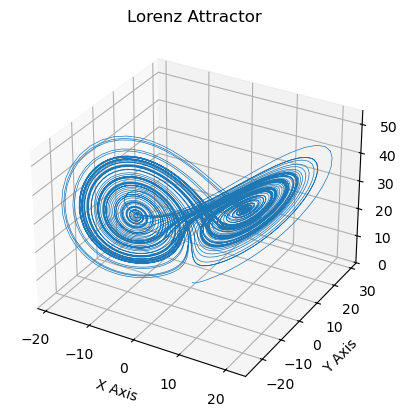

In [50]:
# Plot
ax = plt.figure().add_subplot(projection='3d')

ax.plot(*xyzs.T, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

In [51]:
def rossler(t, Y, omega, a, b, c):
    x, y, z = Y
    dx_dt = -omega * y - z
    dy_dt = omega * x + a * y
    dz_dt = b + z * (x - c)
    return [dx_dt, dy_dt, dz_dt]

In [52]:
a = 0.16
b = 0.1
c = 8.5
omega = 1

In [59]:
sol = solve_ivp(rossler, [0, 1000], [5, 5, 0], args=(omega, a, b, c), dense_output=True)

In [62]:
t = np.linspace(0, 1000, 100000)
res = sol.sol(t)    # dense_output=True

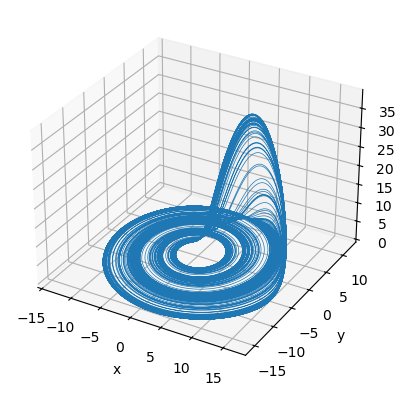

In [63]:
ax = plt.figure().add_subplot(projection='3d')

ax.plot(*res, lw=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()